Requires "test_in.csv", "test_out.csv", "train_in.csv", and "train_out.csv" in this folder.

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import pairwise_distances
from sklearn.metrics import confusion_matrix

import inspect
import random
from random import randint
import time
from itertools import combinations

## Task 1

In [ ]:
F = ["test_in.csv", "test_out.csv", "train_in.csv", "train_out.csv"]
PD = [pd.read_csv(f, header=None) for f in F]
Xtest, ytest, Xtrain, ytrain = [d.to_numpy() for d in PD]
ntrain, nfeatures = Xtrain.shape
ntest, noutcomes = ytest.size, 10

In [ ]:
# Clouds are something like all xs per outcome.
clouds = [[] for _ in range(noutcomes)]
for i in range(ntrain):
    x = Xtrain[i]
    y = ytrain[i].item()
    clouds[y].append(x)

In [ ]:
centres = []
radii = []
print("Digit \t Radius")
for i in range(noutcomes):
    c = np.mean(clouds[i], axis=0)
    centres.append(c)
    max_radius = 0
    for j in range(len(clouds[i])):
        radius = np.linalg.norm(c - clouds[i][j])
        if radius > max_radius:
            max_radius = radius
    print(i, "\t", round(radius, 1))
    radii.append(radius)

Digit 	 Radius
0 	 10.0
1 	 3.3
2 	 9.8
3 	 9.3
4 	 7.5
5 	 11.9
6 	 8.3
7 	 6.1
8 	 7.3
9 	 8.1


0 5 7.52
1 9 9.93
2 8 7.08
3 5 6.12
4 9 6.01
5 3 6.12
6 5 6.7
7 9 5.43
8 9 6.4
9 7 5.43


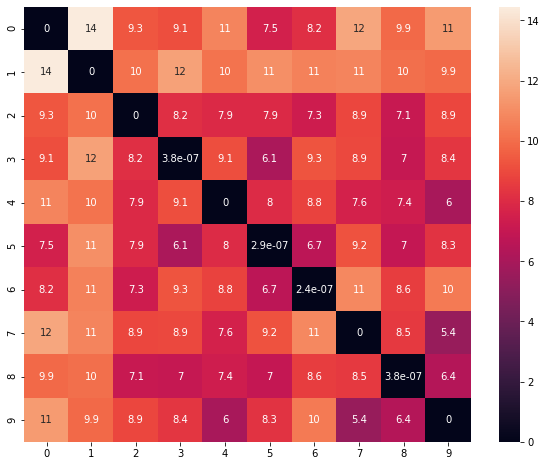

In [ ]:
distances = pairwise_distances(centres)
for i in range(noutcomes):
    x = np.ma.array(distances[i], mask=False)
    x.mask[i] = True
    y = np.argmin(x)
    print(i, y, round(distances[i][y], 2))

plt.rcParams["figure.figsize"] = (10, 8)
sns.heatmap(distances, annot=True)
# Obviously the darker colors / smaller distances are harder to distinguish.

## Task 2

0/1-loss: 0.196

   0     1     2     3     4     5     6     7     8     9     
0 [0.795 0.    0.013 0.009 0.018 0.009 0.103 0.004 0.045 0.004]
1 [0.    0.992 0.    0.    0.    0.    0.008 0.    0.    0.   ]
2 [0.02  0.    0.683 0.059 0.079 0.01  0.    0.02  0.129 0.   ]
3 [0.038 0.    0.038 0.772 0.013 0.101 0.    0.    0.013 0.025]
4 [0.012 0.035 0.035 0.    0.802 0.    0.012 0.012 0.    0.093]
5 [0.055 0.    0.    0.109 0.055 0.691 0.018 0.    0.    0.073]
6 [0.078 0.    0.022 0.    0.022 0.011 0.867 0.    0.    0.   ]
7 [0.    0.031 0.016 0.    0.078 0.    0.    0.781 0.    0.094]
8 [0.033 0.022 0.    0.065 0.033 0.033 0.    0.    0.793 0.022]
9 [0.    0.057 0.    0.    0.091 0.    0.    0.057 0.023 0.773]

0 is classified correctly 79.5 % of the time. Full list of proportions:
[0.795, 0.0, 0.013, 0.009, 0.018, 0.009, 0.103, 0.004, 0.045, 0.004]

1 is classified correctly 99.2 % of the time. Full list of proportions:
[0.0, 0.992, 0.0, 0.0, 0.0, 0.0, 0.008, 0.0, 0.0, 0.0]

2 is cla

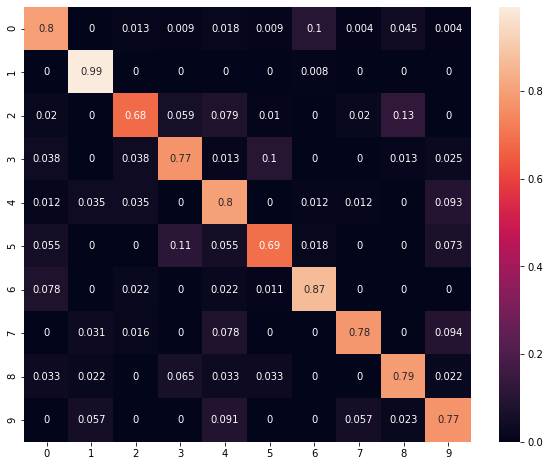

In [ ]:
# It's weird to use Xtest but only Xtrain was used for centers.
X, y = Xtest, ytest
# X, y = Xtrain, ytrain  # pay attention!

# Consider smallest distance to centre a prediction.
predspery = [[0 for _ in range(noutcomes)] for _ in range(noutcomes)]
for i, dds in enumerate(pairwise_distances(centres, X).transpose()):
    predspery[y[i].item()][np.argmin(dds)] += 1

# Convert counts to proportions.
wrongs = 0
for i in range(noutcomes):
    n = sum(predspery[i])
    wrongs += n - predspery[i][i]
    for j in range(noutcomes):
        predspery[i][j] = round(predspery[i][j] / n, 3)

print(f"0/1-loss: {wrongs / len(y)}\n")

print("   ", end="")
[print(str(i) + "     ", end="") for i in range(10)]
print()
for i, x in enumerate(np.array(predspery)):
    print(i, x)
print()
sns.heatmap(predspery, annot=True)
        
for i, x in enumerate(predspery):
    print(f"{i} is classified correctly", round(x[i] * 100, 3),
          f"% of the time. Full list of proportions:\n{x}\n")

## Task 3

### Slide 36 method

In [ ]:
trainInRd = pd.read_csv('train_in.csv', header=None)
testInRd = pd.read_csv('test_in.csv', header=None)
dftr = pd.DataFrame(np.full((1707, 1), 1))
dfts = pd.DataFrame(np.full((1000, 1), 1))
# Add a column of ones to the training data, turn trainIn into a matrix
trainIn = pd.concat([dftr, trainInRd], axis=1).values
testIn = pd.concat([dfts, testInRd], axis=1).values
trainOut = np.reshape(pd.read_csv('train_out.csv', header=None).values.T, 1707)
testOut = np.reshape(pd.read_csv('test_out.csv', header=None).values.T, 1000)

In [ ]:
# Initialize random weights
w = np.random.rand(257,10)
# Calculate the function
output = np.dot(trainIn, w)
# The classification is the index of the node which produced the highest value
results = np.argmax(output, axis=1)

def simple(results, trainOut, output): 
  while not np.array_equal(results, trainOut):
    # All misclassified instances
    wrong = np.asarray(np.nonzero(results-trainOut)).flatten()
    # Select a misclassified example
    index = randint(0, np.size(wrong)-1)
    toUpdate = wrong[index]
    inputx = trainIn[toUpdate] 
    outputy = output[toUpdate]
    # Correct classification
    corr = trainOut[toUpdate]
    # Node that should have been activated the most
    node = outputy[corr]

    # Update weights if necessary
    for i in range(10): 
      if outputy[i] > node: 
        w[:,i] = w[:,i]-inputx

    w[:,corr] = w[:,corr] + inputx

    # Reclassify with updated weights
    output = np.dot(trainIn, w)
    results = np.argmax(output, axis=1)

  return w

In [ ]:
# Test convergence speed, runtime, and accuracy
convSpeed = []
runtime = []
misclass = []
error = []
for i in range(100): 
  w = np.random.rand(257,10)
  # Calculate the function
  output = np.dot(trainIn, w)
  # The classification is the index of the node which produced the highest value
  results = np.argmax(output, axis=1)
  start = time.time()
  updatedW = simple(results, trainOut, output)
  convSpeed.append(time.time()-start)
  testClassOutput = np.dot(testIn, updatedW)
  testClass = np.argmax(testClassOutput, axis=1)
  runtime.append(time.time()-start)
  misclass.append(len(np.asarray(np.nonzero(testClass-testOut)).flatten()))
  error.append(len(np.asarray(np.nonzero(testClass-testOut)).flatten())/ len(testOut))

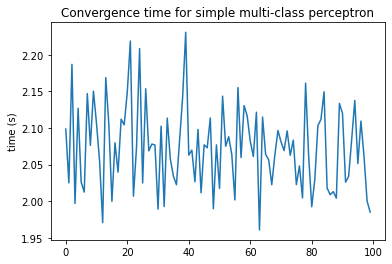

In [ ]:
plt.plot(convSpeed)
plt.ylabel('time (s)')
plt.title('Convergence time for simple multi-class perceptron')
plt.show()

In [ ]:
print(np.mean(convSpeed), np.std(convSpeed))

2.073611195087433 0.05661730913932506


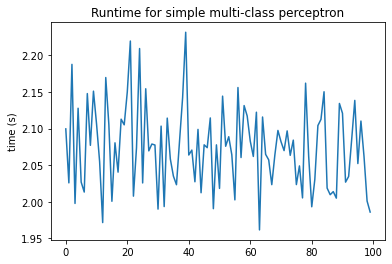

In [ ]:
plt.plot(runtime)
plt.ylabel('time (s)')
plt.title('Runtime for simple multi-class perceptron')
plt.show()

In [ ]:
print(np.mean(runtime), np.std(runtime))

2.0745278429985046 0.0566201629514033


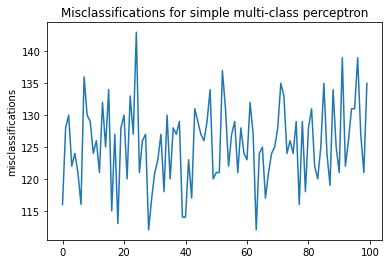

In [ ]:
plt.plot(misclass)
plt.ylabel('misclassifications')
plt.title('Misclassifications for simple multi-class perceptron')
plt.show()

In [ ]:
print(np.mean(misclass), np.std(misclass))

125.48 6.2633537342225845


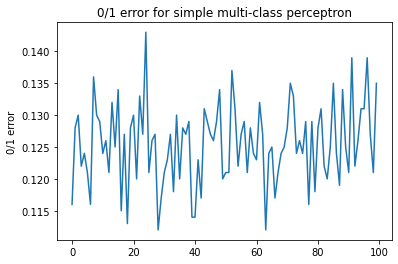

In [ ]:
plt.plot(error)
plt.ylabel('0/1 error')
plt.title('0/1 error for simple multi-class perceptron')
plt.show()

In [ ]:
print(np.mean(error), np.std(error))

0.12548 0.0062633537342225865


### Géron's method

#### Most similar implementation

In [ ]:
def normalize(an_array):
  norm = np.linalg.norm(an_array)
  normal_array = an_array/norm
  return normal_array

# Initialize random weights
w = np.random.uniform(size = (257,10), low = 0, high =1)
# Calculate the function
trainInNorm = normalize(trainIn+1)
output = normalize(np.dot(trainInNorm, w))
# The classification is the index of the node which produced the highest value
results = np.argmax(output, axis=1)

def hebbian(results, trainOut, output): 
  while len(np.asarray(np.nonzero(results-trainOut)).flatten()) > len(trainIn)*0.05:
    # All misclassified instances
    wrong = np.asarray(np.nonzero(results-trainOut)).flatten()
    # Select a misclassified example
    index = randint(0, np.size(wrong)-1)
    toUpdate = wrong[index]
    inputx = trainInNorm[toUpdate]
    outputy = output[toUpdate]
    # Correct classification
    corr = trainOut[toUpdate]
    # Node that should have been activated the most
    node = outputy[corr]

    # Update weights if necessary
    for i in range(10): 
      if i == corr: 
        target = 1
      else: 
        target = 0
    
      # Output target is 0 or 1 (only 1 for node index that should be activated most), current output is in outputy
      w[:,i] = w[:,i] + np.dot((target-outputy[i]), inputx)


    # Reclassify with updated weights
    output = normalize(np.dot(trainInNorm, w))
    results = np.argmax(output, axis=1)
  return w


In [ ]:
# Test convergence speed, runtime and accuracy
convSpeed2 = []
runtime2 = []
misclass2 = []
error2 = []
for i in range(100): 
  # Initialize random weights
  w = np.random.uniform(size = (257,10), low = 0, high =1)
  # Calculate the function
  output = normalize(np.dot(trainInNorm, w))
  # The classification is the index of the node which produced the highest value
  results = np.argmax(output, axis=1)
  start = time.time()
  updatedW = hebbian(results, trainOut, output)
  convSpeed2.append(time.time()-start)
  testClassOutput = np.dot(testIn, updatedW)
  testClass = np.argmax(testClassOutput, axis=1)
  runtime2.append(time.time()-start)
  misclass2.append(len(np.asarray(np.nonzero(testClass-testOut)).flatten()))
  error2.append(len(np.asarray(np.nonzero(testClass-testOut)).flatten())/ len(testOut))

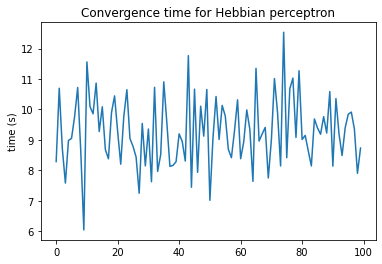

In [ ]:
plt.plot(convSpeed2)
plt.ylabel('time (s)')
plt.title('Convergence time for Hebbian perceptron')
plt.show()

In [ ]:
print(np.mean(convSpeed2), np.std(convSpeed2))

9.283067929744721 1.131151565111471


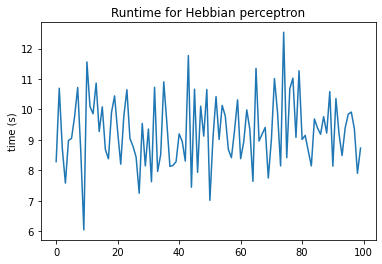

In [ ]:
plt.plot(runtime2)
plt.ylabel('time (s)')
plt.title('Runtime for Hebbian perceptron')
plt.show()

In [ ]:
print(np.mean(runtime2), np.std(runtime2))

9.283966231346131 1.131149597600319


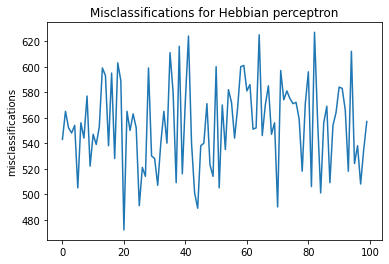

In [ ]:
plt.plot(misclass2)
plt.ylabel('misclassifications')
plt.title('Misclassifications for Hebbian perceptron')
plt.show()

In [ ]:
print(np.mean(misclass2), np.std(misclass2))

554.82 33.83943852962103


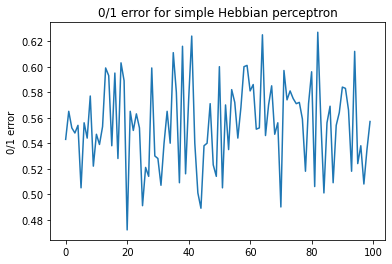

In [ ]:
plt.plot(error2)
plt.ylabel('0/1 error')
plt.title('0/1 error for simple Hebbian perceptron')
plt.show()

#### Experiment with different learning rates
Informal experimentation with the learning rate. In the experiment different learning rates were tried, adaptive learning rates were tried (adapting at different speeds) and the number of misclassifications after each update was monitored. It was found that none of the experiments led to less than 45 misclassifications. The increasing adaptive learning rate worked best but did not drop below 45 misclassifications no matter how the parameters were tuned. Therefore, further testing with this method was not considered as it was not better than the performance of the implementation shown above. 

In [ ]:
# Initialize random weights
w = np.random.uniform(size = (257,10), low = 0, high =1)
# Calculate the function
trainInNorm = normalize(trainIn+1)
output = normalize(np.dot(trainInNorm, w))
# The classification is the index of the node which produced the highest value
results = np.argmax(output, axis=1)

c = 0
while np.array_equal(results, trainOut) == False:
  # Track iterations
  print(c)
  # All misclassified instances
  wrong = np.asarray(np.nonzero(results-trainOut)).flatten()
  # Track the number of wrongly classified examples
  print(len(wrong))
  # Select a misclassified example
  index = randint(0, np.size(wrong)-1)
  toUpdate = wrong[index]
  inputx = trainInNorm[toUpdate]
  outputy = output[toUpdate]
  # Correct classification
  corr = trainOut[toUpdate]
  # Node that should have been activated the most
  node = outputy[corr]

  # Adaptive learning rate: as the number of runs increases, the learning rate increases.
  # Similar experiments were done with decreasing learning rates. 
  eta = 5
  if c > 1000 and c <= 2000: 
    eta = 10
  elif c > 2000 and c <= 3000: 
    eta = 15
  elif c > 3000 and c <= 4000:
    eta = 20
  elif c > 4000: 
    eta = 50

  # Update weights if necessary
  for i in range(10): 
    if i == corr: 
      target = 1
    else: 
      target = 0
    
    # Output target is 0 or 1 (only 1 for node index that should be activated most), current output is in outputy
    w[:,i] = w[:,i] + eta * np.dot((target-outputy[i]), inputx)

  print(w)

  # Reclassify with updated weights
  output = normalize(np.dot(trainInNorm, w))
  results = np.argmax(output, axis=1)
  # Show the results so it can be tracked if wrongly classified 
  print(results[toUpdate], corr)
  c = c+1

#### More deliberate implementation
Only update weights of the target node and of nodes with higher activation then the target node. 

In [ ]:
w = np.random.rand(257,10)  # (257, 10)
output = np.dot(trainIn, w) # (1707, 10)
results = np.argmax(output, axis=1) # (1707,)

def hebbian2(results, trainOut, output):
  while not np.array_equal(results, trainOut):
    index = randint(0, len(results)-1)
    x = trainIn[index] 
    y = trainOut[index]
    y_hat = results[index]

    if y!=y_hat: # Update weights if necessary
      distance = max(output[index,]) - min(output[index,])
      for i in range(10):    
        if output[index,i] > output[index,y]:  
          w[:,i] = w[:,i] + x * (output[index,y]- output[index,i])/distance
      w[:,y] = w[:,y] + x * (output[index,y_hat]- output[index,y])/distance

      output = np.dot(trainIn, w)
      results = np.argmax(output, axis=1)

  return w

In [ ]:
# Test convergence speed, runtime and accuracy
convSpeed3 = []
runtime3 = []
misclass3 = []
error3 = []
for i in range(100): 
  # Initialize random weights
  w = np.random.rand(257,10) 
  # Calculate the function
  output = np.dot(trainIn, w)
  # The classification is the index of the node which produced the highest value
  results = np.argmax(output, axis=1)
  start = time.time()
  updatedW = hebbian2(results, trainOut, output)
  convSpeed3.append(time.time()-start)
  testClassOutput = np.dot(testIn, updatedW)
  testClass = np.argmax(testClassOutput, axis=1)
  runtime3.append(time.time()-start)
  misclass3.append(len(np.asarray(np.nonzero(testClass-testOut)).flatten()))
  error3.append(len(np.asarray(np.nonzero(testClass-testOut)).flatten())/ len(testOut))

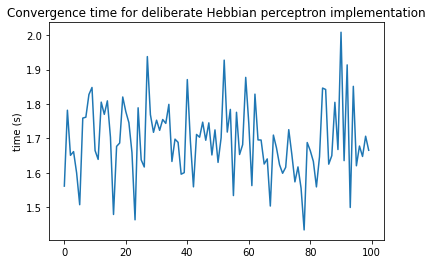

In [ ]:
plt.plot(convSpeed3)
plt.ylabel('time (s)')
plt.title('Convergence time for deliberate Hebbian perceptron implementation')
plt.show()

In [ ]:
print(np.mean(convSpeed3), np.std(convSpeed3))

1.6941541457176208 0.1064457576629425


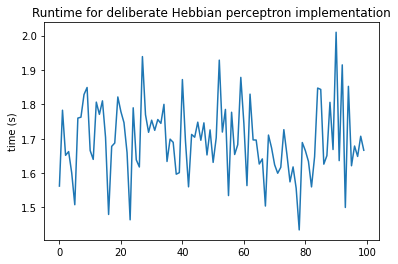

In [ ]:
plt.plot(runtime3)
plt.ylabel('time (s)')
plt.title('Runtime for deliberate Hebbian perceptron implementation')
plt.show()

In [ ]:
print(np.mean(runtime3), np.std(runtime3))

1.6950945138931275 0.10644827470130103


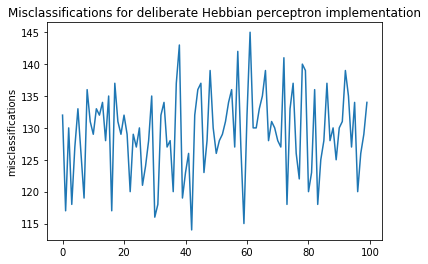

In [ ]:
plt.plot(misclass3)
plt.ylabel('misclassifications')
plt.title('Misclassifications for deliberate Hebbian perceptron implementation')
plt.show()

In [ ]:
print(np.mean(misclass3), np.std(misclass3))

129.25 6.675889453848079


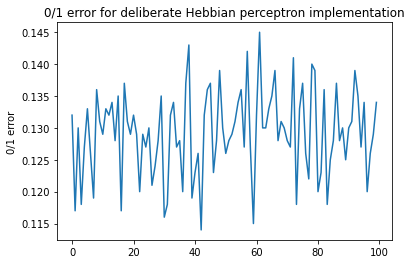

In [ ]:
plt.plot(error3)
plt.ylabel('0/1 error')
plt.title('0/1 error for deliberate Hebbian perceptron implementation')
plt.show()

In [ ]:
print(np.mean(error3), np.std(error3))

0.12924999999999998 0.0066758894538480815


## Task 4
Read data and check the number of examples in each set.

In [ ]:
X_train = pd.read_csv('train_in.csv', header=None)
y_train = pd.read_csv('train_out.csv', header=None)

counts = y_train.iloc[:, 0].value_counts().sort_index()
# display the number of examples in each set
counts

0    319
1    252
2    202
3    131
4    122
5     88
6    151
7    166
8    144
9    132
Name: 0, dtype: int64

In [ ]:
X_train.shape

(1707, 256)

### 4.1 Cover’s Theorem in highly dimensional spaces
What is the chance that a randomly labeled set of N points (in general position) in d-dimensional space, is linearly separable?

- if the number of points in d-dimensional space is smaller than 2*d then they are almost always linearly separable
- if the number of points in d-dimensional space is bigger than 2*d then they are almost always not linearly separable

In [ ]:
N_pairs = []
for i in range(10):
    for j in range(i+1,10):
        N_pairs.append((i,j,counts[i]+counts[j]))

In our case, 2d = 512

In [ ]:
for i in N_pairs:
    if i[2] < 512: # N < 2 * d
        print("{} and {} are almost always linearly separable.".format(i[0], i[1]))
    elif i[2] > 512: # N > 2 * d
        print("{} and {} are almost always not linearly separable.".format(i[0], i[1]))
    else:
        print("{} and {} are hard to determine if they are linearly separable.".format(i[0], i[1]))

0 and 1 are almost always not linearly separable.
0 and 2 are almost always not linearly separable.
0 and 3 are almost always linearly separable.
0 and 4 are almost always linearly separable.
0 and 5 are almost always linearly separable.
0 and 6 are almost always linearly separable.
0 and 7 are almost always linearly separable.
0 and 8 are almost always linearly separable.
0 and 9 are almost always linearly separable.
1 and 2 are almost always linearly separable.
1 and 3 are almost always linearly separable.
1 and 4 are almost always linearly separable.
1 and 5 are almost always linearly separable.
1 and 6 are almost always linearly separable.
1 and 7 are almost always linearly separable.
1 and 8 are almost always linearly separable.
1 and 9 are almost always linearly separable.
2 and 3 are almost always linearly separable.
2 and 4 are almost always linearly separable.
2 and 5 are almost always linearly separable.
2 and 6 are almost always linearly separable.
2 and 7 are almost always 

### 4.2 Implement the simple perceptron algorithm
Apply it to all pairs of sets of images from classes i and j. (Hint: don’t run your algorithm for more than a few hundred iterations).
- activation = sum(weight * x) + bias
- prediction = 1 if activation >= 0 else 0
- weight = weight + learning_rate * (expected - predicted) * x

In [ ]:
### Add the intercept dimension
X_train['bias'] = 1

In [ ]:
def pred(x, weights):
    # this is the prediction function based on the above-mentioned algorithm
    activation = np.dot(x, weights)
    # wx>0: labelled True, wx<0: labelled False
    return activation >= 0  

def learn_weights(train, label, lr, n_epoch): 
    # this is the function to learn weights with a maximum of n_epoch epoches
    # lr is the learning rate
    epoch = 0; errors = []; n = len(label)
    # initialize weights
    weights = np.array([random.random() for i in range(train.shape[1])])
    for i in range(n_epoch * 100):
        idx = random.randint(0, n - 1)
        x = train.iloc[idx,:]
        if_doc = True # a parameter controlling if to update epoch and error

        ### update the weights if the predction is wrong
        if (not pred(x,weights)) and label[idx]:  #  wx<0 but true label is True
            weights += lr*x
        elif pred(x,weights) and (not label[idx]):  #  wx>=0 but true label is false
            weights += - lr*x          
        else:
            if_doc = False  
        if if_doc == True: # if we found an misclassfied example
            epoch += 1 # epoch + 1 only when we update the weight
            err = sum(label!=pred(train, weights))/n
            errors.append(err)
            ### stop the loop if 0-1 error is 0
            if err == 0:
              break
            ### stop the loop after n_epoch runs
            if n_epoch < epoch: 
              break
    return weights, errors

matrix_dic = {}; errors_dic = {}
for pair in N_pairs:
    ### get two digits from each pair
    two_digits = pair[0:2]
    ### slice the train dataframe -> only leave the data for two digits
    train = X_train.loc[[i in two_digits for i in y_train.iloc[:, 0] ],:]
    ### fist digit labelled as True, second digit labelled as False
    label = [i == two_digits[0] for i in y_train.iloc[:, 0] if i in two_digits]    
    weights, errors = learn_weights(train, label, lr = 0.1, n_epoch = 500)
    errors_dic[two_digits] = errors
    cnf_matrix = confusion_matrix(label, pred(train, weights))
    matrix_dic[two_digits] = cnf_matrix.flatten()

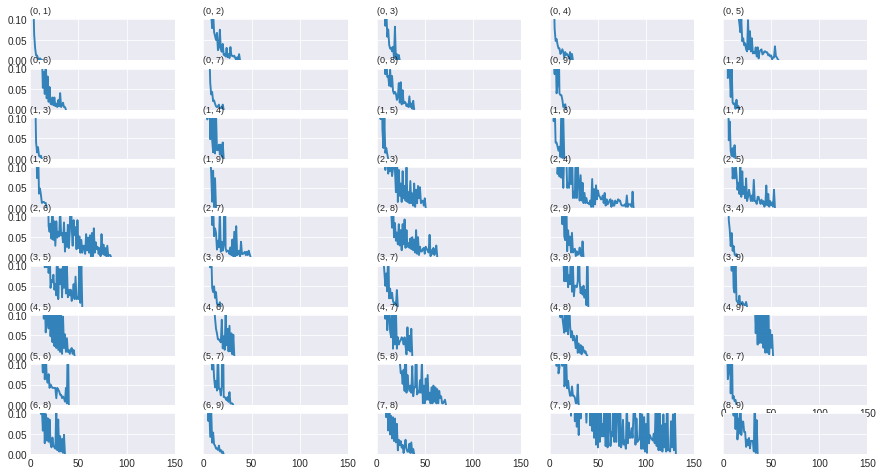

In [ ]:
# Create the small multiples to show the 0-1 error trend
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))

# multiple line plot
num=0
for i in errors_dic:
    num+=1
    plt.subplot(9,5, num)
    plt.plot(errors_dic[i], marker='', linewidth=1.9, alpha=0.9, label=i)
 
    # Same limits!
    plt.xlim(0,150)
    plt.ylim(0,0.1)
 
    # Not ticks everywhere
    if num in range(40) :
        plt.tick_params(labelbottom=False)
    if num not in np.linspace(1,46,num=9,dtype=int,endpoint=False):
        plt.tick_params(labelleft=False)
 
    # Add title
    plt.title(i, loc='left', fontsize=9, fontweight=0)

In [ ]:
### pd.DataFrame.from_dict(errors_dic, orient='index', dtype=None).iloc[:,-1]

In [ ]:
pd.DataFrame.from_dict(matrix_dic, orient='index', dtype=None, 
                      columns = ['correct label first', 'fail to label first', 'fail to label second','correct label second'])

,correct label first,fail to label first,fail to label second,correct label second
"(0, 1)",252,0,0,319
"(0, 2)",202,0,0,319
"(0, 3)",131,0,0,319
"(0, 4)",122,0,0,319
"(0, 5)",88,0,0,319
"(0, 6)",151,0,0,319
"(0, 7)",166,0,0,319
"(0, 8)",144,0,0,319
"(0, 9)",132,0,0,319
"(1, 2)",202,0,0,252


### 4.3 linearly separate the set of all images of i from all remaining images? 

In [ ]:
matrix_dic = {}; errors_dic = {}

for n in range(10):
    train = X_train
    label = [i == n for i in y_train.iloc[:, 0]] 
    weights, errors = learn_weights(train, label, lr = 0.1, n_epoch = 2000)
        
    cnf_matrix = confusion_matrix(label, pred(train, weights))
    matrix_dic[n] = cnf_matrix.flatten()  
    errors_dic[n] = errors

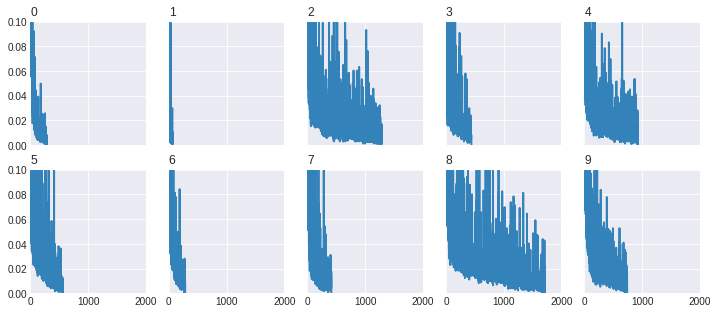

In [ ]:
# Create the small multiples to show the 0-1 error trend
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,5))

# multiple line plot
num=0
for i in errors_dic:
    num+=1
    plt.subplot(2,5, num)
    plt.plot(errors_dic[i], marker='', linewidth=1.9, alpha=0.9, label=i)
 
    # Same limits!
    plt.xlim(0,2000)
    plt.ylim(0,0.1)
 
    # Not ticks everywhere
    if num in range(6) :
        plt.tick_params(labelbottom=False)
    if num not in [1,6]:
        plt.tick_params(labelleft=False)
 
    # Add title
    plt.title(i, loc='left', fontsize=12, fontweight=0)

In [ ]:
pd.DataFrame.from_dict(matrix_dic, orient='index', dtype=None, 
                       columns=['correct label', 'fail to label', 'fail to not lebel','correct not label'])

,correct label,fail to label,fail to not lebel,correct not label
0,1388,0,0,319
1,1455,0,0,252
2,1505,0,0,202
3,1576,0,0,131
4,1585,0,0,122
5,1619,0,0,88
6,1556,0,0,151
7,1541,0,0,166
8,1563,0,0,144
9,1575,0,0,132


## Task 5

In [ ]:
def sigmoid(x): return 1 / (1 + np.exp(-x))

def d_sigmoid(x): return sigmoid(x) - sigmoid(x) ** 2

def relu(x): 
    return x * (x > 0)
    if isinstance(x, (list, np.ndarray)):
        return [y * int(y > 0) for y in x]
    return x * int(x > 0)

def d_relu(x): 
    return 1. * (x > 0)
    if isinstance(x, (list, np.ndarray)):
        return [int(y > 0) for y in x]
    return int(x > 0)

def tanh(x): return np.tanh(x)

def d_tanh(x): return 1 - tanh(x) ** 2

def xor_net(x1, x2, weights, activ=sigmoid):
    # Returns output of a NN with a 2-sized hidden layer.
    # Overly complex to make it the same as in grdmse().

    # Mildly stupid reshaping and renaming of our own input:
    X = np.array([1, x1, x2])
    W = weights[0:3]  # to net1 = sigmoid_inverse(y1)
    V = weights[3:6]  # to net1 = sigmoid_inverse(y1)
    U = weights[6:9]  # to net  = sigmoid_inverse(y)

    # Forward propagation:
    # (Also yes, many of these can be done in one go but follow slides for now.)
    net1 = X.dot(W)
    net2 = X.dot(V)
    y1 = activ(net1)
    y2 = activ(net2)
    # Want bias, net1, and net2 as columns with x_is as rows for the mult.
    H = np.vstack((y1, y2)).T
    H = np.hstack((np.ones((H.shape[0], 1)), H))
    net = H.dot(U)
    # if activ == relu: activ = sigmoid
    y = sigmoid(net)  # NOTE: not activ!
    return y


def mse(weights, X=((0, 0), (0, 1), (1, 0), (1, 1)), y=(0, 1, 1, 0),
        activ=sigmoid):
    # Calculate mean squared error of xor_net().
    return np.mean([(y[i] - xor_net(*X[i], weights, activ)) ** 2
                    for i in range(len(y))])


def misclassified(weights, X=((0, 0), (0, 1), (1, 0), (1, 1)), y=(0, 1, 1, 0),
                  activ=sigmoid, prints=True):
    n = len(y)
    if prints: print("T F")
    for i in range(len(y)):
        y_hat = xor_net(*X[i], weights, activ)
        d = y[i]
        if y_hat > .5 and d or y_hat <= .5 and not d:
            n -= 1
        if prints: print(d, y_hat)
    return n

def judge(weights, activ=sigmoid):
    print("Weights:", [round(w, 3) for w in weights])
    print("MSE:", mse(weights, activ=activ))
    print("Misclassified:", misclassified(weights, activ=activ))
    print()

def grdmse(weights, X=((0, 0), (0, 1), (1, 0), (1, 1)), y=(0, 1, 1, 0),
           activ=sigmoid):
    d_activ = globals()["d_" + activ.__name__]
    # Calculate partial derivative of mean squared error over all weights.

    # Mildly stupid reshaping and renaming of our own input:
    X = np.array(X)
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    d = np.array(y)  # .reshape((4, 1))
    W = weights[0:3]  # to net1 = sigmoid_inverse(y1)
    V = weights[3:6]  # to net1 = sigmoid_inverse(y1)
    U = weights[6:9]  # to net  = sigmoid_inverse(y)

    # Forward propagation:
    # (Also yes, many of these can be done in one go but follow slides for now.)
    net1 = X.dot(W)
    net2 = X.dot(V)
    y1 = activ(net1)
    y2 = activ(net2)
    # Want bias, net1, and net2 as columns with x_is as rows for the mult.
    H = np.vstack((y1, y2)).T
    H = np.hstack((np.ones((H.shape[0], 1)), H))  # 4x3
    net = H.dot(U)
    # if activ == relu: activ = sigmoid
    # NOTE: experiment with always sigmoid for final layer now!
    y = sigmoid(net)  # note: overwriting input that's anyway stored in d

    # Backward propagation
    delta_hideout = d_sigmoid(y) * (y - d)
    U_deltas = (delta_hideout * H.T).T
    # 4x3: has rows for x_is, columns for pu_0, pu_1, pu_2

    delta_Xhide = delta_hideout * X.T
    # print(d_activ(y1))
    # print(y1[y1 < 0] = 0)
    W_deltas = (U[1] * d_activ(y1) * delta_Xhide).T
    V_deltas = (U[2] * d_activ(y2) * delta_Xhide).T

    average_derivatives = np.hstack((np.sum(W_deltas, axis=0),
                                     np.sum(V_deltas, axis=0),
                                     np.sum(U_deltas, axis=0)))
    return average_derivatives


def gradient_descent(eta, n, activ, debug=True):
    weights = weights_init()
    mses = []
    for i in range(n):
        pd = grdmse(weights, activ=activ)
        weights -= eta * pd
        mses.append(mse(weights, activ=activ))
        if debug and  i % (n / 4) == 0:
            print("Iteration", i)
            print("Partials:", [round(p, 3) for p in pd])
            judge(weights, activ=activ)
    return weights, mses

def lazy():
    n = 0
    while True:
        n += 1
        weights = weights_init()
        if misclassified(weights, prints=False) == 0:
            return weights, n
    
def weights_init(): 
    # Glorot
    weights = np.append(np.random.normal(loc=0, scale=1/6, size=6),
                        np.random.normal(loc=0, scale=1/4.5, size=3))
    return weights
    # Xaivier
    weights = np.append(np.random.normal(loc=0, scale=(2 / 6) ** .5, size=6),
                        np.random.normal(loc=0, scale=(2 / 6) ** .5, size=3))
    # return weights
    # Uniform on [-2.5, 2.5]
    return (np.random.uniform(size=9) - .5) * 5

# Check if ReLU can possibly work:
for x in ((0, 0), (0, 1), (1, 0), (1, 1)):
    print(*x, "-->", xor_net(*x, [0, 1, 1, -1, 1, 1, 0, 1, -2], relu) > .5)

0 0 --> [False]
0 1 --> [ True]
1 0 --> [ True]
1 1 --> [False]


In [ ]:
n = 60000
seed = 42
activations = [
    # sigmoid, 
    # tanh, 
    relu
]
etas = [
    0.1,  
    # 0.5, 
    # 1.0, 
    # 2.0
]
results = {}
for activ in activations:
    results[activ] = {}
    for eta in etas:
        np.random.seed(seed)
        results[activ][eta] = gradient_descent(eta, n, activ, debug=False)
        # print(results[activ][eta] )

def weights_init(): 
    # Glorot
    weights = np.append(np.random.normal(loc=0, scale=1/6, size=6),
                        np.random.normal(loc=0, scale=1/4.5, size=3))
    return weights
    # Xaivier
    weights = np.append(np.random.normal(loc=0, scale=(2 / 6) ** .5, size=6),
                        np.random.normal(loc=0, scale=(2 / 6) ** .5, size=3))
    # return weights
    # Uniform on [-2.5, 2.5]
    return (np.random.uniform(size=9) - .5) * 5

n=60000, seed=42


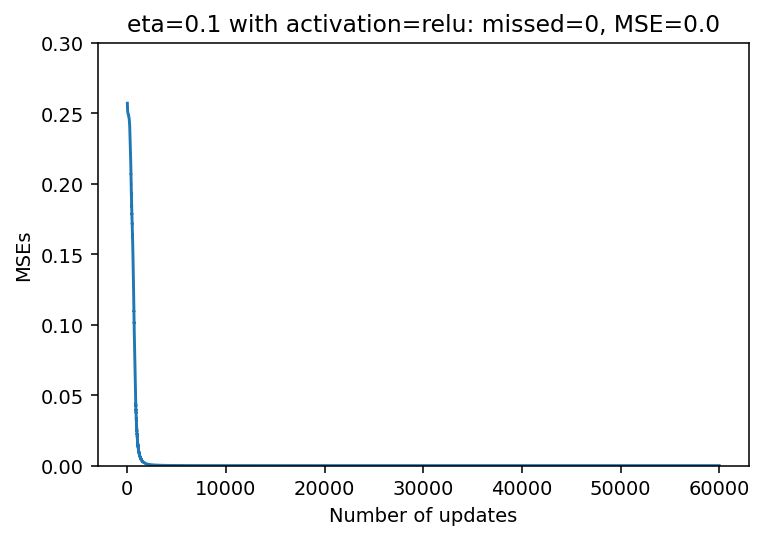

In [ ]:
print(inspect.getsource(weights_init))
print(f"n={n}, seed={seed}")
for activ in results.keys():
    for eta in results[activ].keys():
        weights, mses = results[activ][eta]
        big_string = \
        f"eta={eta} with activation={activ.__name__[:4]}:" \
        f"\tmissed={misclassified(weights, activ=activ, prints=False)}" \
        f", MSE={round(mses[-1], 3)}"
        if False:
            print(big_string)
        else:
            plt.figure(dpi=140, figsize=(6, 4))
            plt.title(big_string.replace('\t', ' '))#, fontsize=16)
            plt.ylabel('MSEs')#, fontsize=15)
            plt.xlabel('Number of updates')#, fontsize=15)
            plt.ylim(top=0.3, bottom=0)
            plt.plot(mses)
            plt.show()

In [ ]:
lazies = []
for i in range(10):
    np.random.seed(i)
    lazies.append(lazy())

In [ ]:
print(inspect.getsource(weights_init))
for i, lazy in enumerate(lazies):
    print(f"{lazy[1]} tries with seed {i}. Weights:")
    print(lazy[0])
    print()

def weights_init(): 
    # Glorot
    weights = np.append(np.random.normal(loc=0, scale=1/6, size=6),
                        np.random.normal(loc=0, scale=1/4.5, size=3))
    return weights
    # Uniform on [-2.5, 2.5]
    return (np.random.uniform(size=9) - .5) * 5

